In [0]:
import cv2
import numpy as np 
import argparse
import time
from google.colab.patches import cv2_imshow

In [0]:
def load_yolo():
	net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
	classes = []
	with open("coco.names", "r") as f:
		classes = [line.strip() for line in f.readlines()]
	layers_names = net.getLayerNames()
	output_layers = [layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
	colors = np.random.uniform(0, 255, size=(len(classes), 3))
	return net, classes, colors, output_layers

In [0]:
def load_image(img_path):
	# image loading
	img = cv2.imread(img_path)
	img = cv2.resize(img, None, fx=0.4, fy=0.4)
	height, width, channels = img.shape
	return img, height, width, channels

In [0]:
def detect_objects(img, net, outputLayers):			
	blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), swapRB=True, crop=False)
	net.setInput(blob)
	outputs = net.forward(outputLayers)
	return blob, outputs

In [0]:
def get_box_dimensions(outputs, height, width):
	boxes = []
	confs = []
	class_ids = []
	for output in outputs:
		for detect in output:
			scores = detect[5:]
			class_id = np.argmax(scores)
			conf = scores[class_id]
			if conf > 0.3:
				center_x = int(detect[0] * width)
				center_y = int(detect[1] * height)
				w = int(detect[2] * width)
				h = int(detect[3] * height)
				x = int(center_x - w/2)
				y = int(center_y - h / 2)
				boxes.append([x, y, w, h])
				confs.append(float(conf))
				class_ids.append(class_id)
	return boxes, confs, class_ids

In [0]:
def draw_labels(boxes, confs, colors, class_ids, classes, img): 
	count_trucks = 0
	count_buses = 0
	count_cars = 0
	count_motorcycles = 0
	indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
	font = cv2.FONT_HERSHEY_PLAIN
	for i in range(len(boxes)):
		if i in indexes:
			x, y, w, h = boxes[i]
			label = str(classes[class_ids[i]])
			color = colors[i]
			if label == "car":
				count_cars = count_cars+1
			if label == "bus":
				count_buses = count_buses+1
			if label == "truck":
				count_trucks = count_trucks+1
			if label == "motorbike":
				count_motorcycles = count_motorcycles+1
			cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
			cv2.putText(img, label, (x, y - 5), font, 1, color, 1)


			
	 
	print("Cars:",count_cars)
	print("Buses:", count_buses)
	print("Trucks:", count_trucks)
	print("MotorBike:", count_motorcycles)
	cv2_imshow(img)

In [0]:
def image_detect(img_path): 
	model, classes, colors, output_layers = load_yolo()
	image, height, width, channels = load_image(img_path)
	blob, outputs = detect_objects(image, model, output_layers)
	boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
	draw_labels(boxes, confs, colors, class_ids, classes, image)
	

Cars: 5
Buses: 0
Trucks: 0
MotorBike: 0


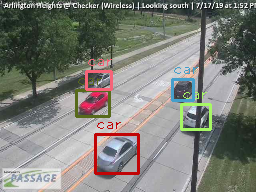

Cars: 1
Buses: 1
Trucks: 0
MotorBike: 0


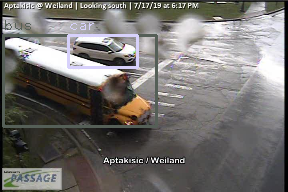

Cars: 4
Buses: 0
Trucks: 0
MotorBike: 0


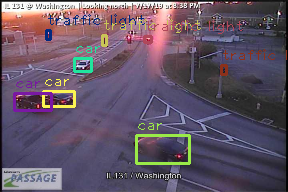

Cars: 1
Buses: 0
Trucks: 0
MotorBike: 0


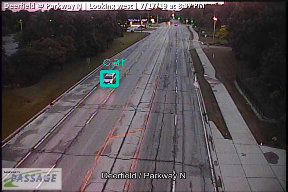

Cars: 10
Buses: 0
Trucks: 0
MotorBike: 0


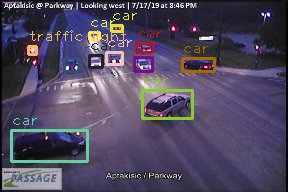

Cars: 5
Buses: 0
Trucks: 0
MotorBike: 0


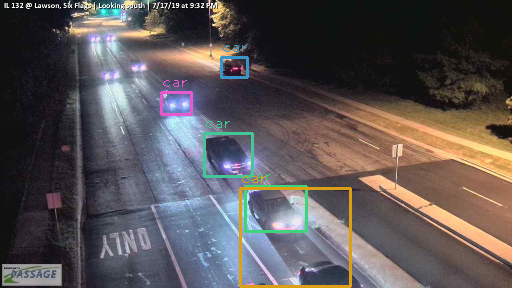

Cars: 3
Buses: 0
Trucks: 0
MotorBike: 0


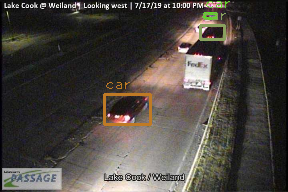

Cars: 4
Buses: 0
Trucks: 1
MotorBike: 0


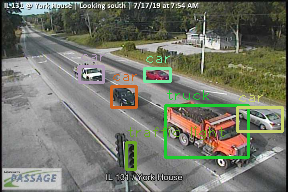

Cars: 8
Buses: 0
Trucks: 1
MotorBike: 0


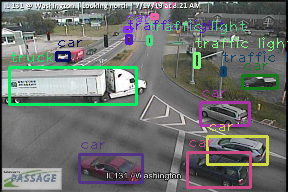

In [0]:
image_detect("/content/2019-7-17-13-55.jpg")
image_detect("/content/2019-7-17-18-20.jpg")
image_detect("/content/2019-7-17-20-40.jpg")
image_detect("/content/2019-7-17-20-40_Dearfield.jpg")
image_detect("/content/2019-7-17-20-50.jpg")
image_detect("/content/2019-7-17-21-35.jpg")
image_detect("/content/2019-7-17-22-5.jpg")
image_detect("/content/2019-7-17-8-0.jpg")
image_detect("/content/2019-7-17-8-25.jpg")

Cars: 7
Buses: 0
Trucks: 1
MotorBike: 0


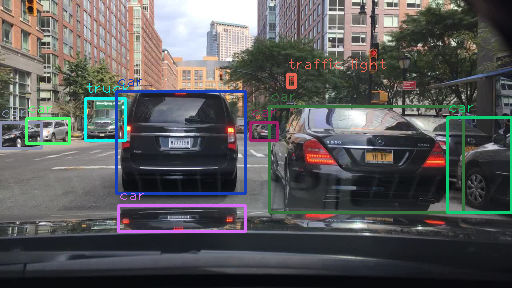

Cars: 2
Buses: 0
Trucks: 1
MotorBike: 0


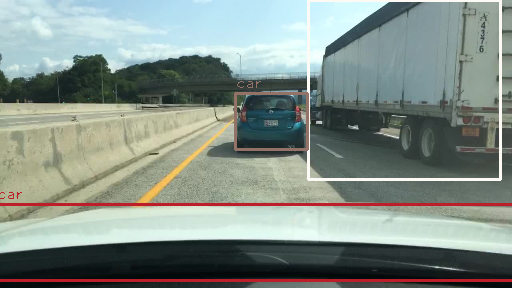

Cars: 5
Buses: 1
Trucks: 0
MotorBike: 0


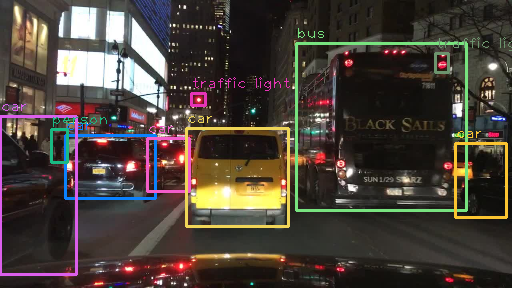

Cars: 4
Buses: 0
Trucks: 0
MotorBike: 0


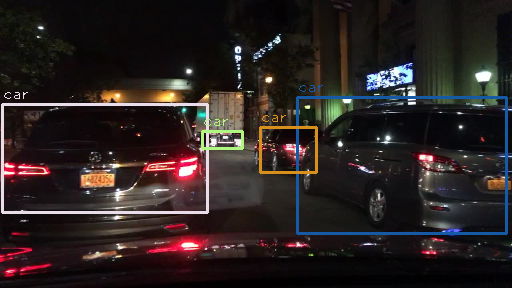

Cars: 4
Buses: 0
Trucks: 0
MotorBike: 0


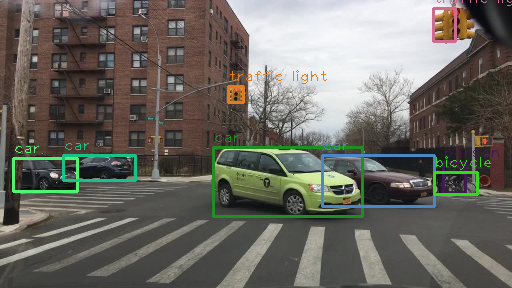

Cars: 1
Buses: 0
Trucks: 0
MotorBike: 0


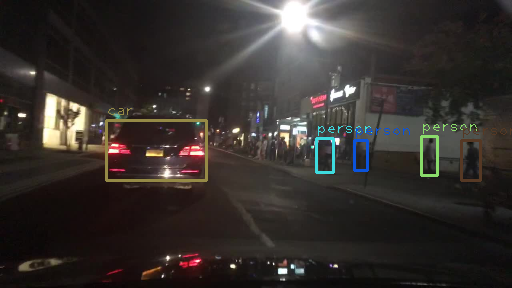

Cars: 3
Buses: 0
Trucks: 0
MotorBike: 0


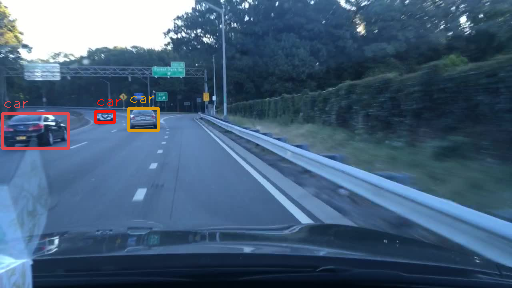

Cars: 4
Buses: 0
Trucks: 1
MotorBike: 0


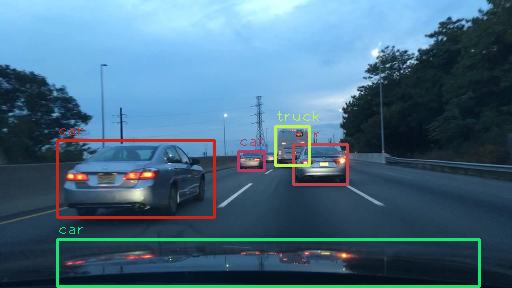

Cars: 8
Buses: 0
Trucks: 0
MotorBike: 0


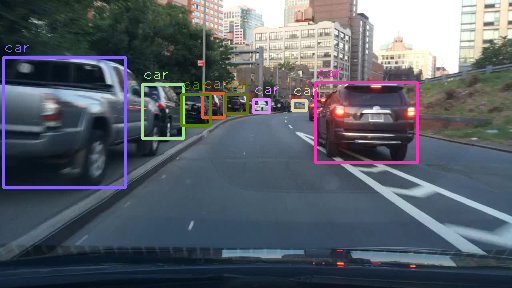

In [0]:
image_detect("/content/00a2f5b6-d4217a96.jpg")
image_detect("/content/0cc6f7a9-6083566a.jpg")
image_detect("/content/0cee1da1-a0e4360e.jpg")
image_detect("/content/0d9e0ea5-009fae0d.jpg")
image_detect("/content/1de6d5ff-8aba6383.jpg")
image_detect("/content/1e47a961-ee8a6b3d.jpg")
image_detect("/content/1f9a0a94-e196c685.jpg")
image_detect("/content/46ec699e-6c9f09b6.jpg")
image_detect("/content/50e9e95c-95b471e6.jpg")